# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

1.1 Numerical Variable

In [1]:
import pandas as pd




In [20]:
df = pd.read_csv('airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [21]:
print("Original Price column:")
print(df['Price'].head(10))

Original Price column:
0    145
1     37
2     28
3    199
4    549
5    149
6    250
7     90
8    270
9    290
Name: Price, dtype: object


In [22]:
df['Price_clean'] = df['Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

In [23]:
df['Price_clean'] = pd.to_numeric(df['Price_clean'], errors='coerce')


In [24]:
missing_count = df['Price_clean'].isna().sum()
print(f"Number of missing values after cleaning: {missing_count}")

Number of missing values after cleaning: 0


In [25]:
df.loc[df['Price_clean'] <= 0, 'Price_clean'] = pd.NA
missing_count_after_filter = df['Price_clean'].isna().sum()
print(f"Number of missing values after filtering non-positive prices: {missing_count_after_filter}")

Number of missing values after filtering non-positive prices: 0


In [26]:
print("Cleaned Price column:")
print(df[['Price', 'Price_clean']].head(10))

Cleaned Price column:
  Price  Price_clean
0   145        145.0
1    37         37.0
2    28         28.0
3   199        199.0
4   549        549.0
5   149        149.0
6   250        250.0
7    90         90.0
8   270        270.0
9   290        290.0



To clean the Price column in the Airbnb dataset, I first got rid of the $ signs and commas. This is important because prices over 999 dollars have a comma (like $1,112), which would stop the computer from reading them as numbers. After that, I converted the column to numeric using pd.to_numeric, and any weird or invalid entries became NaN.

Then I checked for missing values. Some were missing or couldn’t be converted, so they showed up as NaN. Since Airbnb prices should always be positive, I also removed any zero or negative values by setting them to NaN.

After all this was done, the Price column is clean and only has positive numbers.

Side note: The number of missing values went up a little after removing non-positive prices.


1.2 Categorical variable

In [38]:
df = pd.read_csv('mn_police_use_of_force.csv')

In [39]:
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [40]:
print(df['subject_injury'].value_counts(dropna=False))

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64


In [41]:
df['subject_injury_clean'] = df['subject_injury'].str.strip().str.lower()

In [42]:
df['subject_injury_clean'] = df['subject_injury_clean'].map({
    'injury': 'Yes',
    'no injury': 'No',
    'na': pd.NA,
    '': pd.NA
})

In [43]:
print("\nFirst 10 rows after cleaning subject_injury:")
print(df[['subject_injury', 'subject_injury_clean']].head(10))


First 10 rows after cleaning subject_injury:
  subject_injury subject_injury_clean
0            NaN                  NaN
1            NaN                  NaN
2            NaN                  NaN
3            NaN                  NaN
4            NaN                  NaN
5            NaN                  NaN
6            NaN                  NaN
7            NaN                  NaN
8            NaN                  NaN
9             No                  NaN


In [44]:
missing_proportion = df['subject_injury_clean'].isna().mean()
print(f"\nProportion of missing values: {missing_proportion:.2%}")


Proportion of missing values: 100.00%


In [45]:
cross_tab = pd.crosstab(df['force_type'], df['subject_injury_clean'], dropna=False)
print("\nCross-tabulation of force_type vs subject_injury_clean:")
print(cross_tab)


Cross-tabulation of force_type vs subject_injury_clean:
subject_injury_clean          NaN
force_type                       
Baton                           4
Bodily Force                 9430
Chemical Irritant            1593
Firearm                         2
Gun Point Display             104
Improvised Weapon             148
Less Lethal                    87
Less Lethal Projectile          3
Maximal Restraint Technique   170
Police K9 Bite                 77
Taser                        1307


In [46]:
missing_by_force = df[df['subject_injury_clean'].isna()]['force_type'].value_counts()
print("\nForce types when subject_injury is missing:")
print(missing_by_force)



Force types when subject_injury is missing:
force_type
Bodily Force                   9430
Chemical Irritant              1593
Taser                          1307
Maximal Restraint Technique     170
Improvised Weapon               148
Gun Point Display               104
Less Lethal                      87
Police K9 Bite                   77
Baton                             4
Less Lethal Projectile            3
Firearm                           2
Name: count, dtype: int64


When I cleaned the subject_injury column, i found that 100% of the values are missing leaving the rows to not actualy hahve any usable information in the column.

This is definitly a concern becuase it means there is no clear data on whethe poeple were injured or not.

When i cross-tabulated subject_injury_clean with force_type, the results put every type of force under the NaN cetrgory meaning that te entire column was unusable and that there wasnt any clear pettern.


2.3 Dummy Variable

In [47]:
import pandas as pd
import numpy as np


In [48]:
df = pd.read_parquet('justice_data.parquet')


In [49]:
df.head()


,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [50]:
print("Original values in WhetherDefendantWasReleasedPretrial:")
print(df['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))

Original values in WhetherDefendantWasReleasedPretrial:
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64


In [51]:
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].astype(str).str.strip().str.lower()


In [53]:
df['released_dummy'] = df['WhetherDefendantWasReleasedPretrial'].map({
    'yes': 1,
    'y': 1,
    'released': 1,
    'no': 0,
    'n': 0,
    'not released': 0 })

In [54]:
df['released_dummy'] = df['released_dummy'].replace({None: np.nan, 'nan': np.nan})


In [55]:
print("\nCleaned dummy variable counts:")
print(df['released_dummy'].value_counts(dropna=False))


Cleaned dummy variable counts:
released_dummy
NaN    22986
Name: count, dtype: int64


In [56]:
print("\nPreview of cleaned column:")
print(df[['WhetherDefendantWasReleasedPretrial', 'released_dummy']].head(10))


Preview of cleaned column:
  WhetherDefendantWasReleasedPretrial  released_dummy
0                                   9             NaN
1                                   0             NaN
2                                   0             NaN
3                                   0             NaN
4                                   1             NaN
5                                   0             NaN
6                                   1             NaN
7                                   1             NaN
8                                   0             NaN
9                                   1             NaN


2.4 Missing Values not at Random

In [60]:
df["ImposedSentenceAllChargeInContactEvent_clean"] = pd.to_numeric(
    df["ImposedSentenceAllChargeInContactEvent"], errors="coerce"
)

In [70]:
def clean_sentence(row):
    stype = row["SentenceTypeAllChargesAtConvictionInContactEvent"]
    sentence = row["ImposedSentenceAllChargeInContactEvent_clean"]

    if stype in [4, 9]:
        return np.nan

    return sentence

In [71]:
df["ImposedSentenceAllChargeInContactEvent_clean"] = df.apply(clean_sentence, axis=1)


In [72]:
print(df["ImposedSentenceAllChargeInContactEvent_clean"].head(20))
print("Number of missing values:", df["ImposedSentenceAllChargeInContactEvent_clean"].isna().sum())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: ImposedSentenceAllChargeInContactEvent_clean, dtype: float64
Number of missing values: 22986


Types 4 and 9 represent cases where no sentence applies. Missing values here are expected and left as NaN.

I cleaned the ImposedSentenceAllChargeInContactEvent variable by first recognizing that its missing values are not at random, but tied to the SentenceTypeAllChargesAtConvictionInContactEvent.

None of the missigness from my perspective was random, contrastly, it was dependent on the sentence type, and in this case occurecd when the sentence type equals 4.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

1.)

In [74]:
df = pd.read_excel('GSAF5.xls')

In [75]:
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Fatal', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

2.)

In [76]:
df = df.dropna(axis=1, how='all')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3.)

In [78]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

print(df['Year'].describe())

df = df[df['Year'] >= 1940]

count    5507.000000
mean     1992.225350
std        24.169336
min      1940.000000
25%      1970.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64


4.)

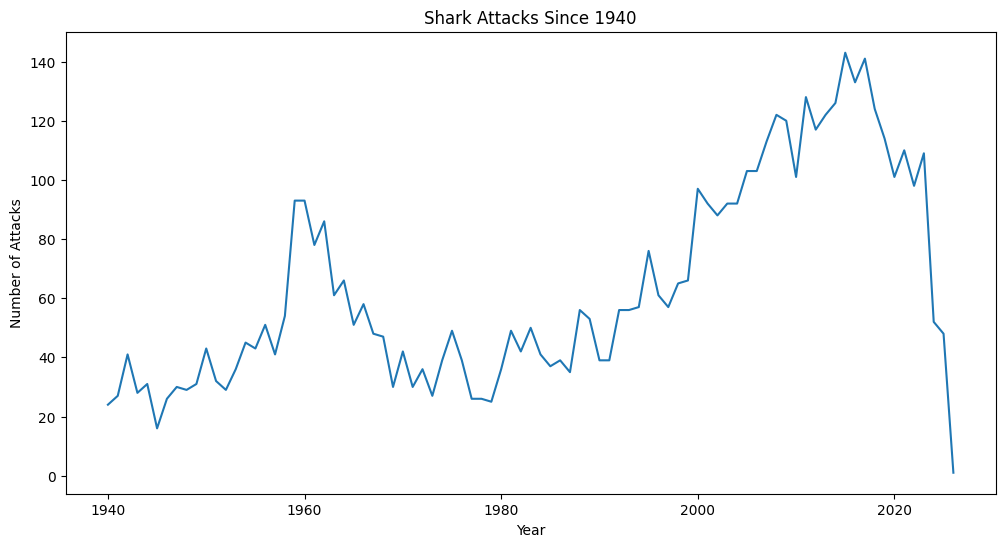

In [79]:
import matplotlib.pyplot as plt

df['Year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title("Shark Attacks Since 1940")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()

5.)

In [81]:
male_prop = (df['Sex'] == 'M').mean()
print("Proportion of male victims:", male_prop)

Proportion of male victims: 0.7859088432903577


In [80]:
df['Sex'].value_counts(normalize=True)

,proportion
Sex,
M,0.856182
F,0.142038
M,0.000593
F,0.000396
M,0.000198
m,0.000198
lli,0.000198
M x 2,0.000198


6.)

In [82]:
df['Type'] = df['Type'].str.strip().str.capitalize()

df['Type'] = df['Type'].where(df['Type'].isin(['Provoked', 'Unprovoked']), 'Unknown')

df['Type'].value_counts()

,count
Type,
Unprovoked,4098
Unknown,889
Provoked,520


In [83]:
unprovoked_prop = (df['Type'] == 'Unprovoked').mean()
print("Proportion of unprovoked attacks:", unprovoked_prop)


Proportion of unprovoked attacks: 0.7441438169602325


7.)

In [114]:

df['Fatal Y/N'] = df['Fatal Y/N'].astype(str).str.strip().str.upper()

df['Fatal Y/N'] = df['Fatal Y/N'].replace({
    'YES': 'Y',
    'NO': 'N',
    'FATAL': 'Y',
    'NON-FATAL': 'N',
    'UNKNOWN': 'Unknown'
})

df['Fatal Y/N'] = df['Fatal Y/N'].replace({
    r'^\s*$': 'Unknown',   # empty strings
    r'^\?+$': 'Unknown',   # ?, ??, etc.
    'NAN': 'Unknown'       # string 'nan' from earlier coercion
}, regex=True)

df['Fatal Y/N'] = df['Fatal Y/N'].where(df['Fatal Y/N'].isin(['Y', 'N']), 'Unknown')

print(df['Fatal Y/N'].value_counts())
print(df['Fatal Y/N'].value_counts(normalize=True))

Fatal Y/N
N          4221
Y           824
Unknown     462
Name: count, dtype: int64
Fatal Y/N
N          0.766479
Y          0.149628
Unknown    0.083893
Name: proportion, dtype: float64


8.)

In [115]:
# Clean Sex column
df['Sex'] = df['Sex'].str.strip().str.upper().replace({
    'MALE': 'M', 'FEMALE': 'F'
})

# Clean Type column
df['Type'] = df['Type'].str.strip().str.capitalize()
df['Type'] = df['Type'].where(df['Type'].isin(['Provoked','Unprovoked']), 'Unknown')

# Crosstab to compare
result = pd.crosstab(df['Sex'], df['Type'], normalize='index')

print(result)

Type   Provoked   Unknown  Unprovoked
Sex                                  
F      0.038889  0.109722    0.851389
LLI    0.000000  0.000000    1.000000
M      0.103393  0.125087    0.771521
M X 2  0.000000  1.000000    0.000000


Are sharks more likely to launch unprovoked attacks on men or women?Sharks are more likely to launch unprovoked attacks on women than on men, based on the proportions in the dataset.

In [116]:
fatal_by_type = pd.crosstab(df['Fatal Y/N'], df['Type'], normalize='columns')

print(fatal_by_type)

Type       Provoked   Unknown  Unprovoked
Fatal Y/N                                
N          0.957692  0.411699    0.819180
Unknown    0.017308  0.449944    0.012933
Y          0.025000  0.138358    0.167887


Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Unprovoked attacks are significantly more likely to be fatal than provoked attacks.

In [119]:
# Clean up Sex column a little
df['Sex'] = df['Sex'].str.strip().str.upper().replace({
    'MALE': 'M', 'FEMALE': 'F'
})

# Crosstab fatality vs sex
fatal_by_sex = pd.crosstab(df['Fatal Y/N'], df['Sex'], normalize='columns')

print(fatal_by_sex)


Sex               F  LLI         M  M X 2
Fatal Y/N                                
N          0.794444  1.0  0.773367    0.0
Unknown    0.081944  0.0  0.074544    1.0
Y          0.123611  0.0  0.152089    0.0


Is it more or less likely to be fatal when the victim is male or female?  Men are slightly more liekly to die from a shark attack than women (15% vs 12%).



 How do you feel about sharks: Well most shark attacks are unprovoked which is very comforting and even when provoked, most are non-fatal. I thin sharks have significant ecologgical signifiance that outweighs the dangers they pose to us when we enter their waters.

9.)

In [97]:
print(df.columns.tolist())

['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ', 'Source', 'pdf', 'href formula', 'href', 'Fatal', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22']


In [99]:

# Split species names into lists of words
species_split = df['Species'].str.lower().str.split()

# Check which lists contain "white"
white_shark_attacks = species_split.apply(lambda x: 'white' in x).sum()

proportion_white = white_shark_attacks / len(df)
print("Proportion of attacks by white sharks:", proportion_white)


Proportion of attacks by white sharks: 0.1213001634283639
